In [ ]:
    #Importar librerías
import pandas as pd
import numpy as np
import pylab as plt

In [ ]:
    #Leer datos
df = pd.read_csv('SeriesTiempo_Est. Biol. Pitilla 2007-21.txt', sep='\t')
df['Precipitacion'] =  pd.to_numeric(df['Precipitacion'],errors='coerce')
xls = pd.ExcelFile('SeriesTiempo_Est. Biol. Pitilla 2007-21.xlsx')
data = xls.parse(sheet_name='Hoja1')

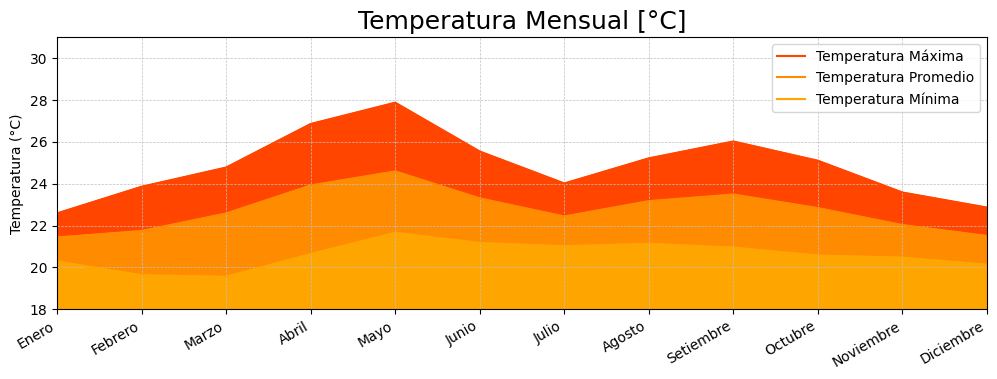

In [ ]:
    #Agrupar datos y calcular la media mensual para toda la serie
data['Precipitacion'] = pd.to_numeric(data['Precipitacion'],errors='coerce')
agrup = data.groupby('Mes').agg([np.nanmean])


    #Luego se pueden graficar usando el módulo pylab
Meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Setiembre','Octubre','Noviembre','Diciembre']    
fig = plt.figure(figsize=(12,4),dpi=100)
plt.title("Temperatura Mensual [°C]",size=18)
plt.ylabel('Temperatura (°C)')


plt.plot(Meses,agrup['T_max (no especifica)']['nanmean'], label='Temperatura Máxima',color='orangered')
plt.fill_between(Meses,agrup['T_max (no especifica)']['nanmean'],0,color='orangered')

plt.plot(Meses,agrup['T_mean']['nanmean'],label='Temperatura Promedio',color='darkorange')
plt.fill_between(Meses,agrup['T_mean']['nanmean'],0,color='darkorange')

plt.plot(Meses,agrup['T_min (no especifica)']['nanmean'],label='Temperatura Mínima',color='orange')
plt.fill_between(Meses,agrup['T_min (no especifica)']['nanmean'],0,color='orange')
plt.legend(loc = "best")
plt.ylim(18,31)
plt.xlim('Enero','Diciembre')
plt.grid(color='silver', linestyle='--', linewidth=0.5)
fig.autofmt_xdate()

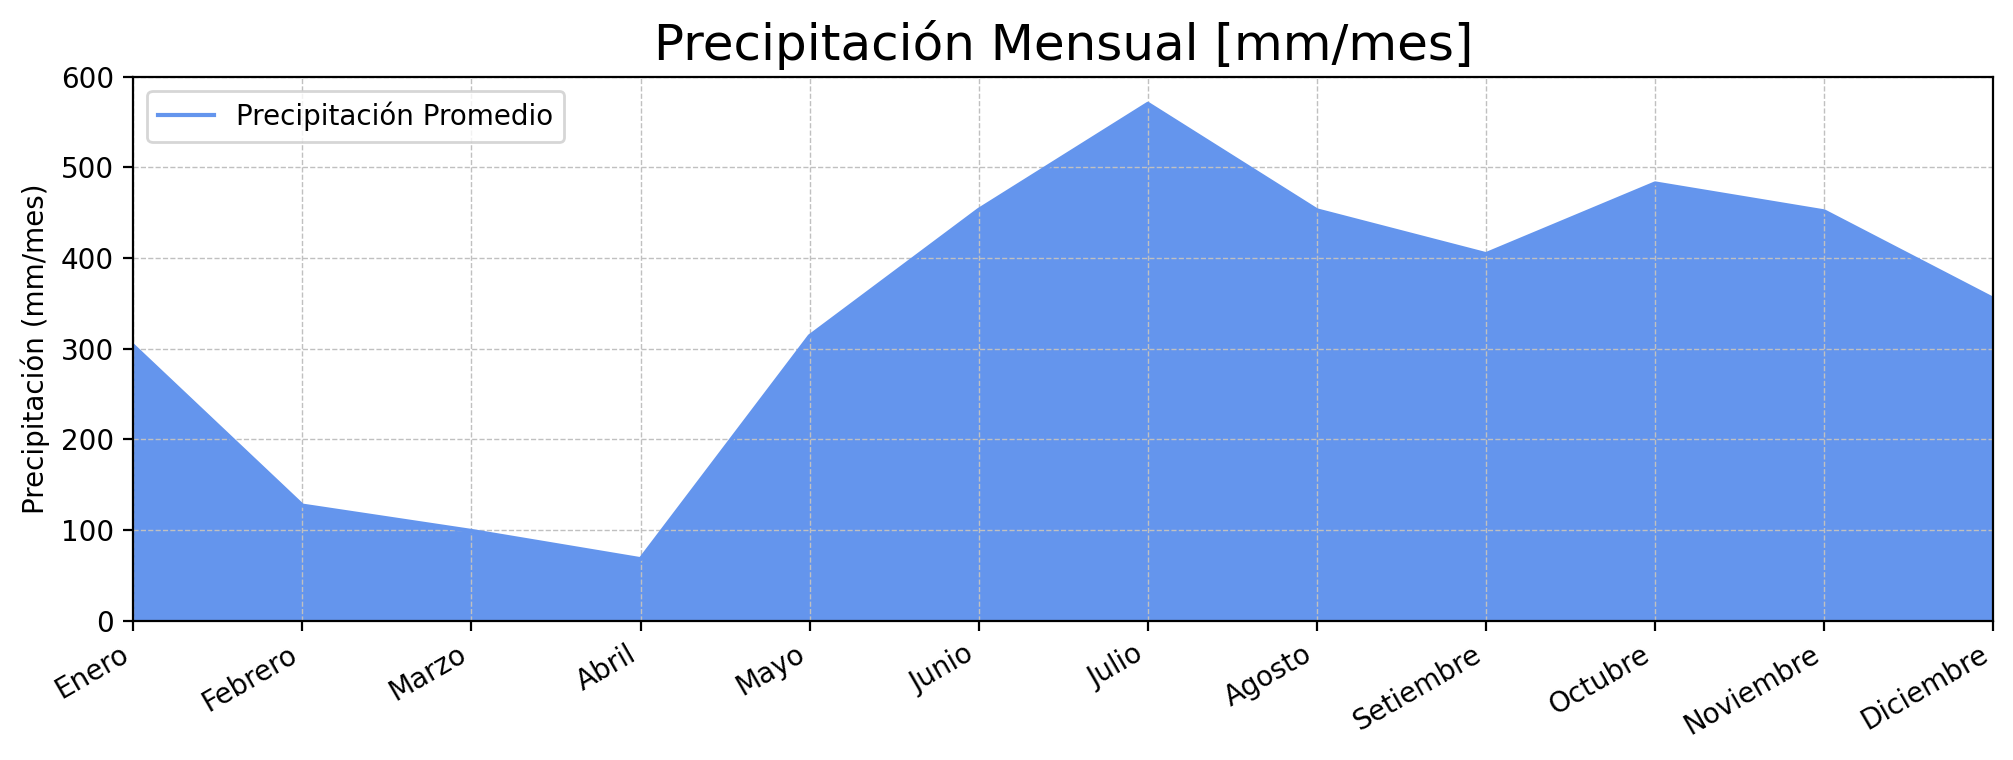

In [ ]:
Meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Setiembre','Octubre','Noviembre','Diciembre']
dias = [31,28,31,30,31,30,31,31,30,31,30,31]

P_mensual= agrup['Precipitacion']['nanmean']*dias

#Luego se pueden graficar usando el módulo pylab
fig = plt.figure(figsize=(12,4),dpi=200)
plt.title("Precipitación Mensual [mm/mes]",size=18)
plt.ylabel('Precipitación (mm/mes)')


plt.plot(Meses,P_mensual,label='Precipitación Promedio',color='cornflowerblue')
plt.fill_between(Meses,P_mensual,0,color='cornflowerblue')

plt.xlim('Enero','Diciembre')
plt.ylim(0,600)
plt.legend(loc='upper left')
plt.grid(color='silver', linestyle='--', linewidth=0.5)
fig.autofmt_xdate()

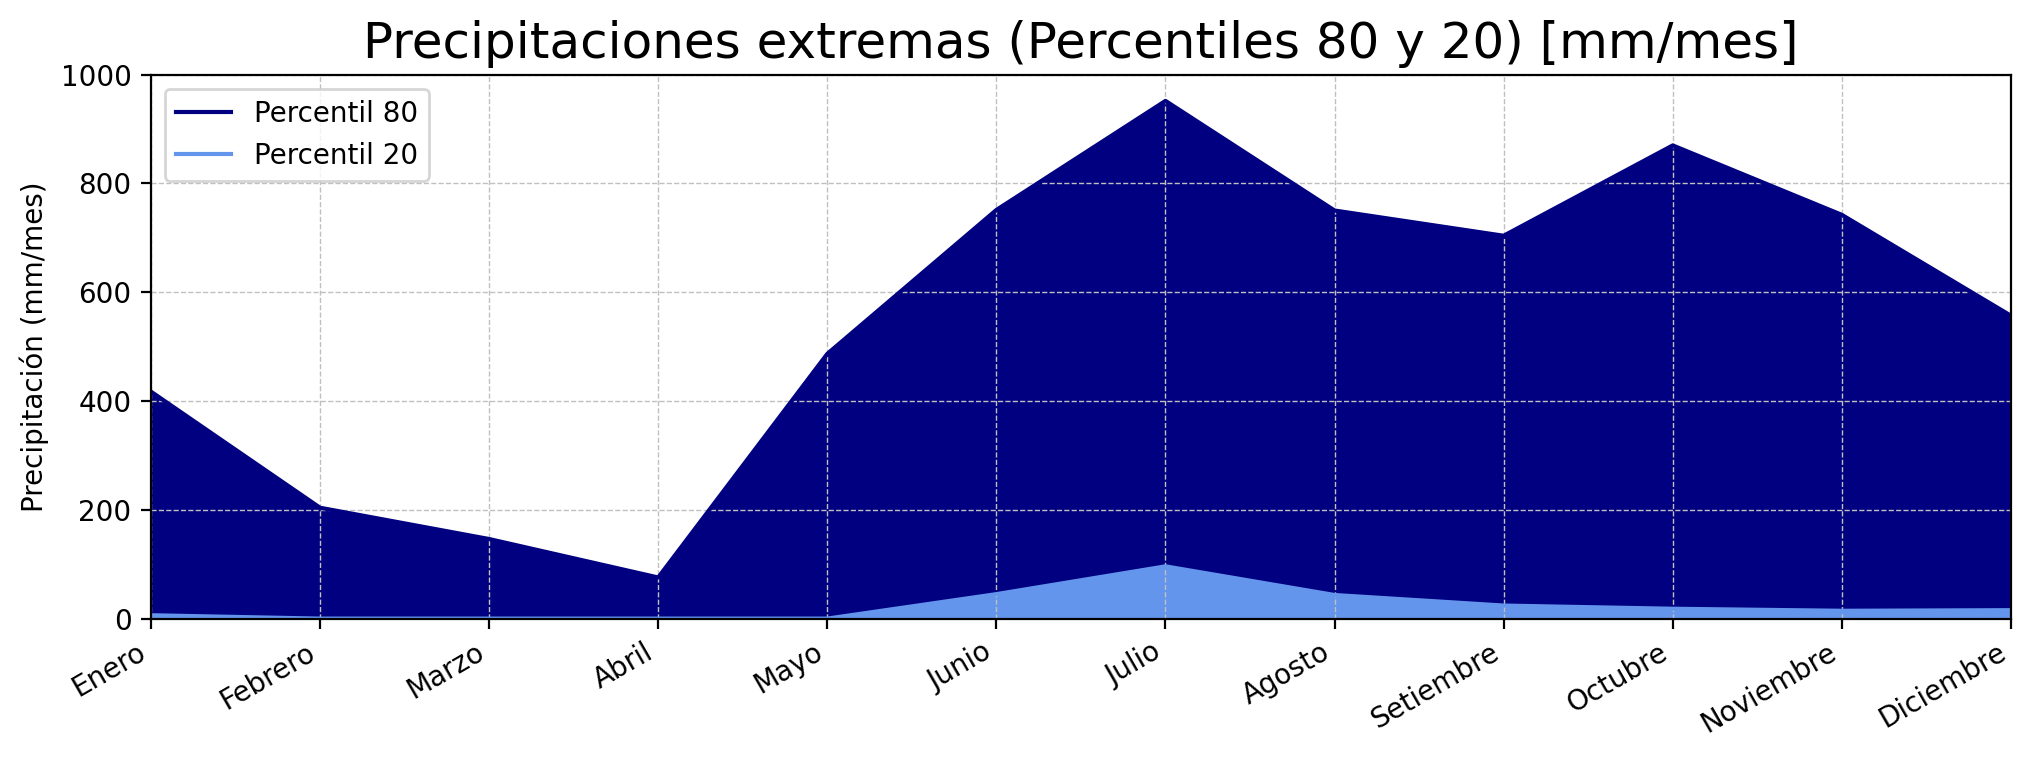

In [ ]:
    #Calcular percentiles 80 y 20 para determinar eventos extremos
per_precip_80 = data.groupby('Mes').Precipitacion.quantile(0.8)
per_precip_80= per_precip_80*dias

per_precip_20 = data.groupby('Mes').Precipitacion.quantile(0.2)
per_precip_20= per_precip_20*dias

    #Luego se pueden graficar usando el módulo pylab
fig = plt.figure(figsize=(12,4),dpi=200)
plt.title("Precipitaciones extremas (Percentiles 80 y 20) [mm/mes]",size=18)
plt.ylabel('Precipitación (mm/mes)')


plt.plot(Meses,per_precip_80,label='Percentil 80',color='navy',dash_capstyle='round')
plt.fill_between(Meses,per_precip_80,0,color='navy')

plt.plot(Meses,per_precip_20,label='Percentil 20',color='cornflowerblue',dash_capstyle='round')
plt.fill_between(Meses,per_precip_20,0,color='cornflowerblue')

plt.xlim('Enero','Diciembre')
plt.ylim(0,1000)
plt.legend()
plt.grid(color='silver', linestyle='--', linewidth=0.5)
fig.autofmt_xdate()

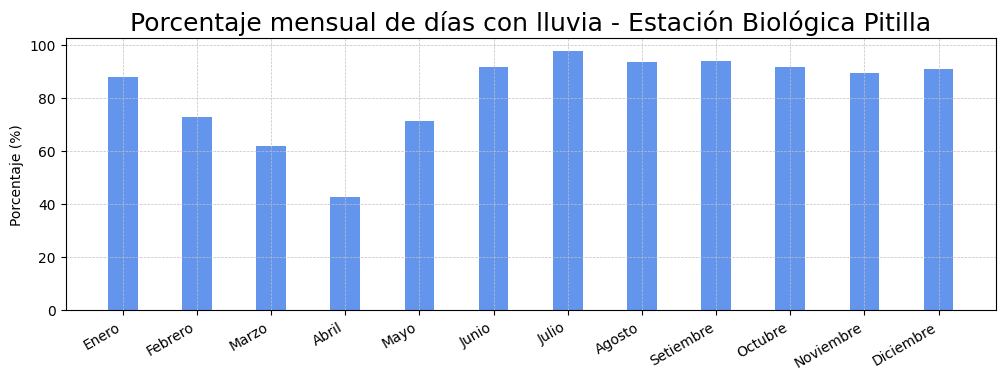

In [ ]:
    #Calcular el porcentaje mensual de precipitación, contando los días con lluvia
pt= data.groupby('Mes').agg([np.count_nonzero])
pt

porcents = (pt['Precipitacion']['count_nonzero']/pt['Dia']['count_nonzero'])*100
porcents


fig = plt.figure(figsize=(12,4),dpi=100)
plt.title("Porcentaje mensual de días con lluvia - Estación Biológica Pitilla",size=18)
plt.ylabel('Porcentaje (%)')

y_pos = np.arange(len(Meses))

# Create bars
plt.bar(y_pos, porcents,width=0.4,color='cornflowerblue')

# Create names on the x-axis
plt.xticks(y_pos, Meses)

plt.grid(color='silver', linestyle='--', linewidth=0.5)

fig.autofmt_xdate()

In [ ]:
import folium
from folium import plugins
%matplotlib inline
import branca
import branca.colormap as cm
import numpy as np


    #Grafica el mapa de fondo
m = map = folium.Map(location=[11, -85], tiles='OpenStreetMap', zoom_start=10)


lat = 10.9895 
lon = -85.4258

folium.Marker(
    location=[10.98953 , -85.42588],
    popup="Estación Biológica Pitilla",
    icon=folium.Icon(icon="house-window"),
).add_to(m)

m